### sklearn.decomposition.PCA
* class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)[source]




In [12]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt


columns = iris.feature_names
iris_df = pd.DataFrame(iris.data,columns =columns)
iris_df['target'] = iris.target

print(iris_df.shape)
iris_df.head(3)

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


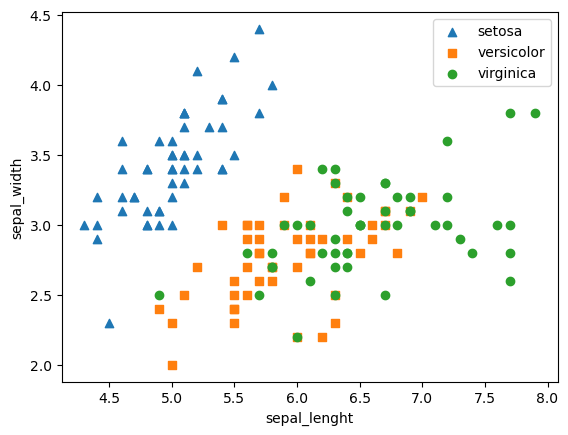

In [16]:
markers=['^','s','o']

for i ,marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target']==i]['sepal length (cm)']
    y_axis_data = iris_df[iris_df['target']==i]['sepal width (cm)']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal_lenght')
plt.ylabel('sepal_width')
plt.show()

In [17]:
## 정규화

from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris_df)


In [18]:
## pca 

from sklearn.decomposition import PCA

pca =PCA(n_components=2)

iris_pca = pca.fit_transform(iris_scaled)

print(iris_pca)

[[-2.57612023  0.47449927]
 [-2.41532249 -0.67809197]
 [-2.65933256 -0.34828193]
 [-2.60199054 -0.60330594]
 [-2.68374418  0.6402204 ]
 [-2.41219305  1.48486231]
 [-2.72650791  0.04037433]
 [-2.54754039  0.21784304]
 [-2.63111739 -1.12151504]
 [-2.50568834 -0.47375311]
 [-2.49309024  1.03899203]
 [-2.62658449  0.12690795]
 [-2.53463285 -0.73367377]
 [-2.89043509 -0.96998871]
 [-2.52492662  1.85524436]
 [-2.57661201  2.68047277]
 [-2.52724177  1.47833344]
 [-2.51071301  0.48379741]
 [-2.26217005  1.40241037]
 [-2.64311325  1.12144398]
 [-2.27440347  0.40624212]
 [-2.52398522  0.91873733]
 [-3.01440545  0.44855689]
 [-2.18617043  0.08328077]
 [-2.54029796  0.1318046 ]
 [-2.30389499 -0.62854387]
 [-2.38796377  0.23807154]
 [-2.49345491  0.52241515]
 [-2.46849629  0.30877814]
 [-2.57304603 -0.34338528]
 [-2.46542208 -0.50910641]
 [-2.20111339  0.42157396]
 [-2.88118696  1.78514571]
 [-2.7365533   2.14366739]
 [-2.44028112 -0.46445497]
 [-2.52638532 -0.21106318]
 [-2.38926985  0.65800169]
 

In [19]:
pca_columns = ['pca_component_1','pca_component_2']

iris_df_pca = pd.DataFrame(iris_pca,columns=pca_columns)
iris_df_pca['target'] = iris.target
iris_df_pca.head()

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0


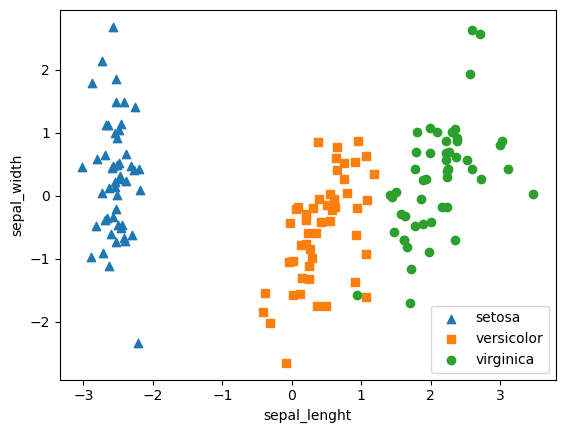

In [20]:
markers=['^','s','o']

for i ,marker in enumerate(markers):
    x_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal_lenght')
plt.ylabel('sepal_width')
plt.show()

In [21]:
pca.explained_variance_ratio_

array([0.76740358, 0.18282727])

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(random_state=156)

scores = cross_val_score(rfc,iris.data,iris.target,scoring='accuracy',cv=3)
print(scores,scores.mean())

[0.98 0.94 0.96] 0.96


In [34]:
pca_x =iris_df_pca[['pca_component_1']]
scores_pca = cross_val_score(rfc,pca_x,iris.target,scoring='accuracy',cv=3)
print(scores_pca,scores_pca.mean())

[0.98 1.   1.  ] 0.9933333333333333


In [37]:
LCV = LogisticRegression()
pca_x =iris_df_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(LCV,pca_x,iris.target,scoring='accuracy',cv=3)
print(scores_pca,scores_pca.mean())

[0.98 1.   1.  ] 0.9933333333333333
